# Assignment 4 Question 2
## Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.columns = ['YOE','SAL']
data.head(2)

,YOE,SAL
0,1.1,39343.0
1,1.3,46205.0


### Exploring the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOE     30 non-null     float64
 1   SAL     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.corr()

,YOE,SAL
YOE,1.000000,0.978242
SAL,0.978242,1.000000


<Axes: xlabel='YOE', ylabel='Count'>

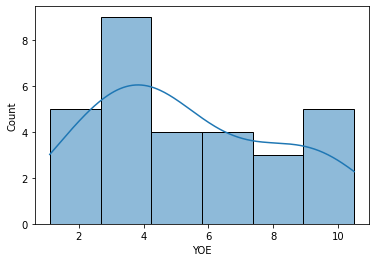

In [6]:
sns.histplot(data['YOE'], kde=True)

<Axes: xlabel='SAL', ylabel='Count'>

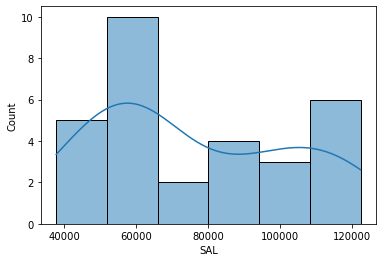

In [7]:
sns.histplot(data['SAL'], kde=True)

<Axes: xlabel='YOE', ylabel='SAL'>

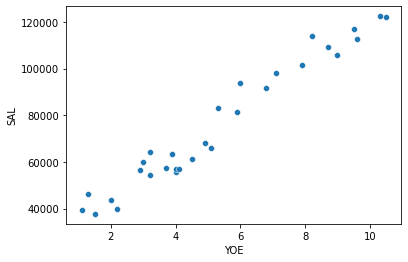

In [8]:
sns.scatterplot(x=data.YOE, y=data.SAL)

<Axes: xlabel='YOE', ylabel='SAL'>

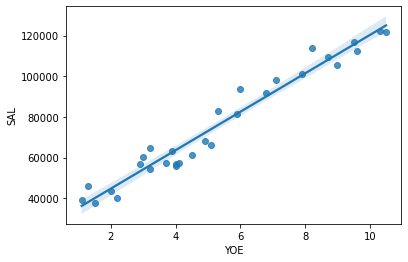

In [9]:
sns.regplot(x=data.YOE, y=data.SAL)

In [10]:
model = smf.ols('SAL~YOE',data=data).fit()
# print(model.summary())

print(model.params)
print(model.tvalues, '\n', model.pvalues)
print(model.rsquared)

Intercept    25792.200199
YOE           9449.962321
dtype: float64
Intercept    11.346940
YOE          24.950094
dtype: float64 
 Intercept    5.511950e-12
YOE          1.143068e-20
dtype: float64
0.9569566641435086


## Initiating the list to store the R-Square Values for every model

In [11]:
R_Squared_list = []
model_r_square = ['Simple Model',model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.9569566641435086]]

# Prediction for New Datapoints

- Equation: Salary = (9449.962321)YearsExperience + 25792.200199

In [12]:
# Initiating a new dummy data
new_df = pd.DataFrame([3,5,7,10,2,1],columns=['YOE'])

In [13]:
new_df

,YOE
0,3
1,5
2,7
3,10
4,2
5,1


In [14]:
# Prediction using the model
model.predict(new_df)

0     54142.087163
1     73042.011806
2     91941.936449
3    120291.823413
4     44692.124842
5     35242.162520
dtype: float64

In [15]:
# Adding the prediction to the same dataframe
new_df['Pred_Salary'] = model.predict(new_df)
new_df

,YOE,Pred_Salary
0,3,54142.087163
1,5,73042.011806
2,7,91941.936449
3,10,120291.823413
4,2,44692.124842
5,1,35242.162520


<Axes: xlabel='YOE', ylabel='Pred_Salary'>

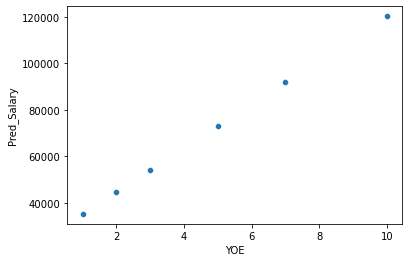

In [16]:
# Plotting the predicted data
sns.scatterplot(x=new_df.YOE, y=new_df.Pred_Salary)

## Residual Plot for Simple Linear Regression without transformation

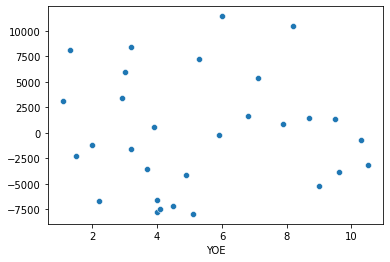

In [17]:
sns.scatterplot(x=data['YOE'], y=(data['SAL'] - model.predict(data['YOE'])))
plt.show()

# Insight:
### The residual doesn't seems to have any pattern, Hence highly likely the linear fit is best

# Tranforming the Dependant variables

In [18]:
data['Log_SAL'] = np.log(data['SAL'])  ## log(x) Transformation
data['sqrt_SAL'] = np.sqrt(data['SAL']) ## (x)^1/2 Transformation
data['cbrt_SAL'] = np.power(data['SAL'],1/3)  ## x^1/3 Transformation
data['log_sqrt_SAL'] = np.log(data['SAL']) + np.sqrt(data['SAL']) ## log(x) + x^1/2 Transformation

In [19]:
data.head(2)

,YOE,SAL,Log_SAL,sqrt_SAL,cbrt_SAL,log_sqrt_SAL
0,1.1,39343.0,10.580073,198.350700,34.011242,208.930773
1,1.3,46205.0,10.740843,214.953483,35.883626,225.694327


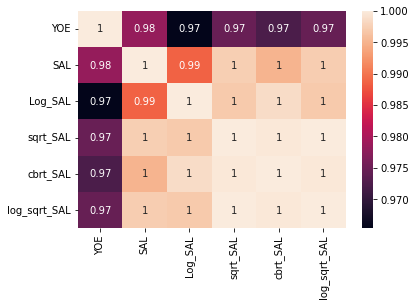

In [20]:
sns.heatmap(data.corr(), annot=True)
plt.show()

# Insight:
### The Correlation has dropped after doing the transformations

## Plotting the scatter plots with transformed data

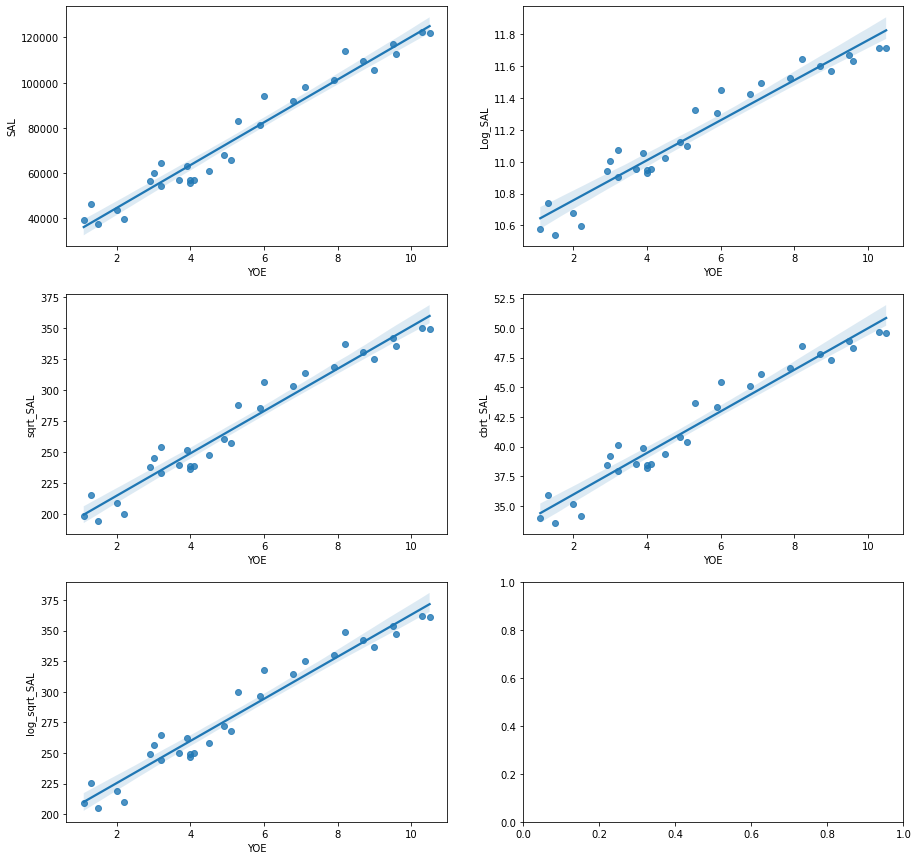

In [21]:
fig, axs = plt.subplots(3,2,figsize=(15,15))
sns.regplot(x='YOE',y='SAL',data=data,ax=axs[0,0])
sns.regplot(x='YOE',y='Log_SAL',data=data,ax=axs[0,1])
sns.regplot(x='YOE',y='sqrt_SAL',data=data,ax=axs[1,0])
sns.regplot(x='YOE',y='cbrt_SAL',data=data,ax=axs[1,1])
sns.regplot(x='YOE',y='log_sqrt_SAL',data=data,ax=axs[2,0])
plt.show()

# `log(x)` Transformed Model

In [22]:
log_model = smf.ols('Log_SAL~YOE',data=data).fit()
# print(model.summary())

print(log_model.params)
print(log_model.tvalues, '\n', log_model.pvalues)
print(log_model.rsquared)

Intercept    10.507402
YOE           0.125453
dtype: float64
Intercept    273.327166
YOE           19.584833
dtype: float64 
 Intercept    1.604634e-49
YOE          7.027439e-18
dtype: float64
0.9319671194084195


In [23]:
model_r_square = ['log(x) Transformed Model',log_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.9569566641435086],
 ['log(x) Transformed Model', 0.9319671194084195]]

## Residual Plot for `log(x)` Transformed Model

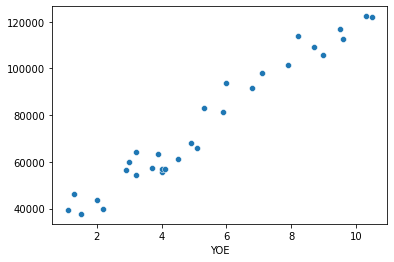

In [24]:
sns.scatterplot(x=data['YOE'], y=(data['SAL'] - log_model.predict(data['YOE'])))
plt.show()

# Insight:
### Residual is increasing linearly

# `sqrt(x)` Transformed Model

In [25]:
data.head(2)

,YOE,SAL,Log_SAL,sqrt_SAL,cbrt_SAL,log_sqrt_SAL
0,1.1,39343.0,10.580073,198.350700,34.011242,208.930773
1,1.3,46205.0,10.740843,214.953483,35.883626,225.694327


In [26]:
sqrt_model = smf.ols('sqrt_SAL~YOE',data=data).fit()
# print(model.summary())

print(sqrt_model.params)
print(sqrt_model.tvalues, '\n', sqrt_model.pvalues)
print(sqrt_model.rsquared)

Intercept    180.700221
YOE           17.056532
dtype: float64
Intercept    40.646251
YOE          23.025247
dtype: float64 
 Intercept    1.920194e-26
YOE          9.782891e-20
dtype: float64
0.9498353533865289


In [27]:
model_r_square = ['sqrt(x) Transformed Model',sqrt_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.9569566641435086],
 ['log(x) Transformed Model', 0.9319671194084195],
 ['sqrt(x) Transformed Model', 0.9498353533865289]]

## Residual Plot for `sqrt(x)` Transformed Model

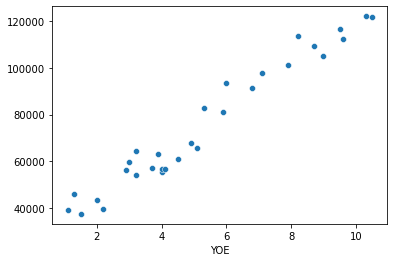

In [28]:
sns.scatterplot(x=data['YOE'], y=(data['SAL'] - sqrt_model.predict(data['YOE'])))
plt.show()

# Insight:
### Residual is increasing linearly

# `cube root(x)` Transformed Model

In [29]:
data.head(2)

,YOE,SAL,Log_SAL,sqrt_SAL,cbrt_SAL,log_sqrt_SAL
0,1.1,39343.0,10.580073,198.350700,34.011242,208.930773
1,1.3,46205.0,10.740843,214.953483,35.883626,225.694327


In [30]:
cbrt_model = smf.ols('cbrt_SAL~YOE',data=data).fit()
# print(model.summary())

print(cbrt_model.params)
print(cbrt_model.tvalues, '\n', cbrt_model.pvalues)
print(cbrt_model.rsquared)

Intercept    32.453864
YOE           1.751471
dtype: float64
Intercept    67.821095
YOE          21.966101
dtype: float64 
 Intercept    1.320725e-32
YOE          3.420225e-19
dtype: float64
0.945152842233794


In [31]:
model_r_square = ['cube root(x) Transformed Model',cbrt_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.9569566641435086],
 ['log(x) Transformed Model', 0.9319671194084195],
 ['sqrt(x) Transformed Model', 0.9498353533865289],
 ['cube root(x) Transformed Model', 0.945152842233794]]

## Residual Plot for `cube root(x)` Transformed Model

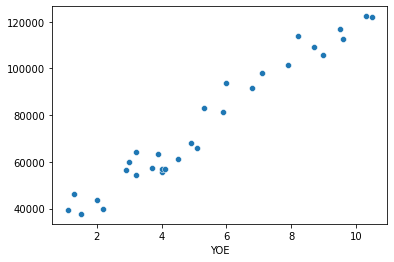

In [32]:
sns.scatterplot(x=data['YOE'], y=(data['SAL'] - cbrt_model.predict(data['YOE'])))
plt.show()

# Insight:
### Residual is increasing linearly

# `log(x) + sqrt(x)` Transformed Model

In [33]:
data.head(2)

,YOE,SAL,Log_SAL,sqrt_SAL,cbrt_SAL,log_sqrt_SAL
0,1.1,39343.0,10.580073,198.350700,34.011242,208.930773
1,1.3,46205.0,10.740843,214.953483,35.883626,225.694327


In [34]:
log_sqrt_model = smf.ols('log_sqrt_SAL~YOE',data=data).fit()
# print(model.summary())

print(log_sqrt_model.params)
print(log_sqrt_model.tvalues, '\n', log_sqrt_model.pvalues)
print(log_sqrt_model.rsquared)

Intercept    191.207623
YOE           17.181985
dtype: float64
Intercept    42.655675
YOE          23.003648
dtype: float64 
 Intercept    5.076755e-27
YOE          1.003057e-19
dtype: float64
0.9497458410351914


In [35]:
model_r_square = ['log(x) + sqrt(x) Transformed Model',log_sqrt_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.9569566641435086],
 ['log(x) Transformed Model', 0.9319671194084195],
 ['sqrt(x) Transformed Model', 0.9498353533865289],
 ['cube root(x) Transformed Model', 0.945152842233794],
 ['log(x) + sqrt(x) Transformed Model', 0.9497458410351914]]

## Residual Plot for `log(x) + sqrt(x)` Transformed Model

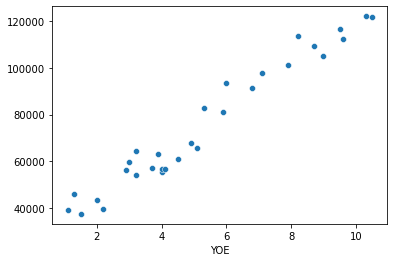

In [36]:
sns.scatterplot(x=data['YOE'], y=(data['SAL'] - log_sqrt_model.predict(data['YOE'])))
plt.show()

# Insight:
### Residual is increasing linearly

In [37]:
R_Squared_df = pd.DataFrame(R_Squared_list,columns=['Model_Name', 'R_Square_Value'])
R_Squared_df

,Model_Name,R_Square_Value
0,Simple Model,0.956957
1,log(x) Transformed Model,0.931967
2,sqrt(x) Transformed Model,0.949835
3,cube root(x) Transformed Model,0.945153
4,log(x) + sqrt(x) Transformed Model,0.949746


# Insight:
### The Simple Linear Regression Model without Transformation has the best `R^2`

# Will try to remove some high influence points using Cook's distance for simple model and fit the model again

In [38]:
## Getting the Cook's distance threshold
cook_distance_threshold = 4/(data.shape[0])
cook_distance_threshold

0.13333333333333333

In [39]:
model_influence = model.get_influence()
c, _ = model_influence.cooks_distance
c

array([2.04861819e-02, 1.25145650e-01, 8.72116606e-03, 1.93092472e-03,
       5.84154210e-02, 1.16363588e-02, 3.40167284e-02, 2.19613539e-03,
       6.17099555e-02, 9.25533214e-03, 2.21968428e-04, 4.01548032e-02,
       2.90705910e-02, 3.56540638e-02, 3.01682374e-02, 9.42447229e-03,
       3.39239364e-02, 2.76816818e-02, 1.88727425e-05, 7.43028573e-02,
       1.98157219e-03, 2.24043716e-02, 7.68659258e-04, 1.31754523e-01,
       2.96376458e-03, 4.57869868e-02, 4.00003185e-03, 3.18614898e-02,
       1.52660429e-03, 3.02325174e-02])

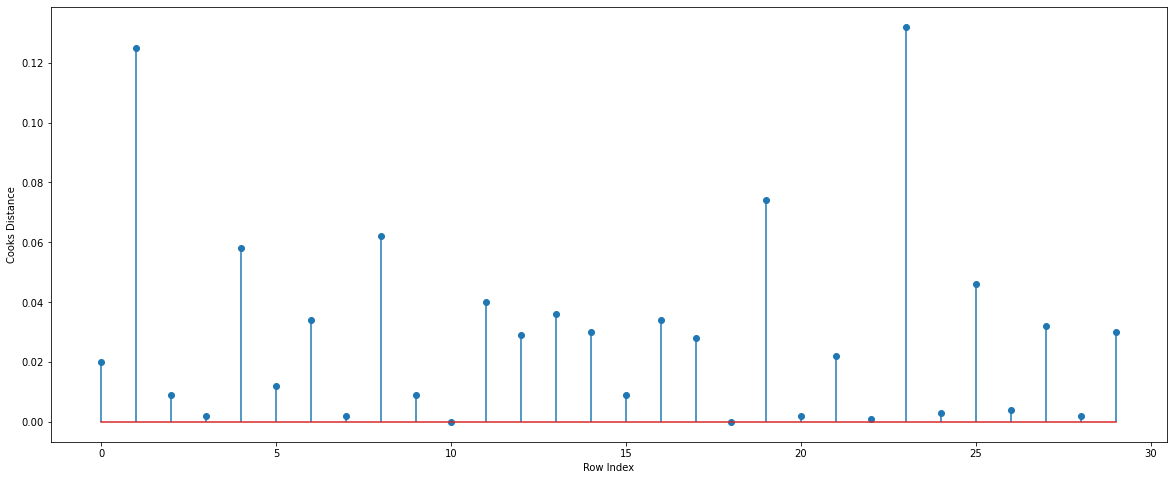

In [40]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
# Indexes where the Cook's distance is more than threshold
np.argwhere(c>cook_distance_threshold)

array([], shape=(0, 1), dtype=int64)

# Insight:
### None of the points are highly influencial points

# Best `R^2` and Corresponding model

In [42]:
R_Squared_df[R_Squared_df['R_Square_Value']==R_Squared_df['R_Square_Value'].max()]

,Model_Name,R_Square_Value
0,Simple Model,0.956957
